# Credit Card Fraud Detection

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions while there are 284,315 non-fraudulent transactions. The dataset is highly unbalanced. 
Dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 

* Features V1, V2, ... V28 are only PCA principal components.
* Class : 0 and 1 values. 0 is a fraud transaction while 1 is not.

#### Goal:

We need to find out the best Machine Learning model accuracy to predict the fraudulent transactions after doing some preprocessing steps on the provides "creditcard" dataset.  

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [354]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [355]:
print(data.shape)
print(data.info())
data.describe()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [356]:
#make sure no missing data
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [357]:
#Class data, 0 is a fraud transaction while 1 is not
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

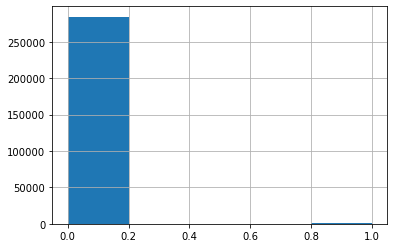

In [358]:
data.Class.hist(bins=5)
#data.Class.plot(kind='bar')

In [359]:
#Data seems to be highly imbalanced, fraud transaction propertion in te dataset:
fraud = data[data.Class == 1]
fraud_percent = np.round(len(fraud)/len(data) * 100, 4) #length of fraudulent transactions / length of all Class data 
fraud_percent

0.1727

<AxesSubplot:>

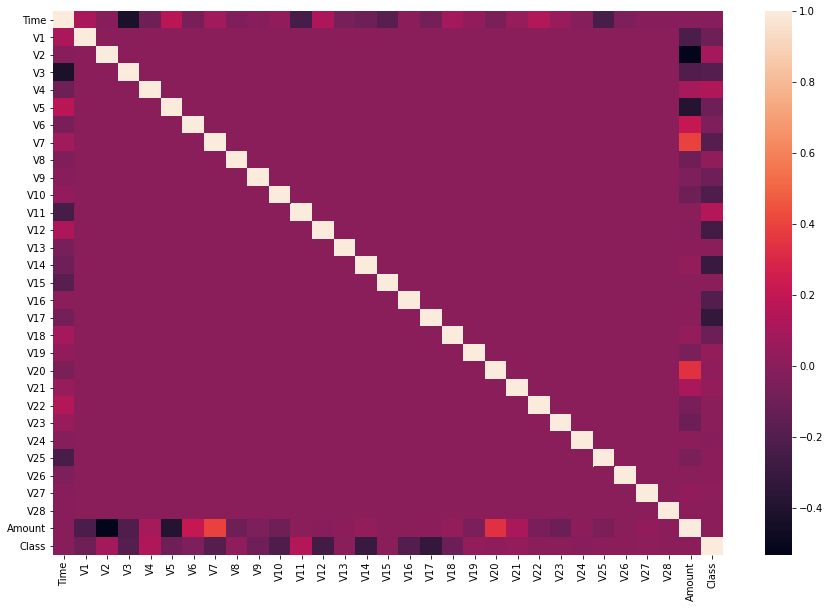

In [360]:
#Correlation matrix:
#data.corr()
f, ax = plt.subplots(figsize=(15, 10));
sns.heatmap(data.corr(), annot=False)

We could notice some features are highly correlated by class especially amountt but in genral we could take all columns to be our features without dropping any.

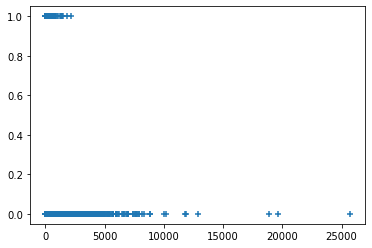

In [361]:
plt.scatter(data.Amount, data.Class, marker='+')

# Undersampling Dataset 

While data ia highly imbalanced, Let's do a simple technique "undersampling" over the higher data "Non-fraud" for the sake of lower on to try to create a balanced one with reliable results. As a dataset validation way, we will compare the original dataset mean distribution to the new undersampled one, we will need both to have close mean calculations to avoid creating new or misleading dataset.

In [362]:
#I will copy the data, to test them with diff tchniques:
data1 = data.copy()
data1.shape

(284807, 31)

In [363]:
#creating 1-dimentional array 
fraud_indices = np.array(data1[data1.Class==1].index)
print(fraud_indices.shape)
non_fraud_indices = np.array(data1[data1.Class == 0].index)
print(non_fraud_indices.shape)

(492,)
(284315,)


In [364]:
fraud_len= len(fraud_indices)
fraud_len

492

In [365]:
data1.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Building a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions as Fraud Transactions=492

In [366]:
#non_fraud_sample = non_fraud

In [367]:
random_normal_indices = np.random.choice(non_fraud_indices, fraud_len, replace = False )
random_normal_indices.shape

(492,)

In [368]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_indices.shape

(984,)

In [369]:
undersample_data = data1.iloc[under_sample_indices]
undersample_data.shape

(984, 31)

In [370]:

undersample_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97110.963415,0.037923,-0.077329,-0.067460,-0.007840,0.007603,-0.121338,0.002262,-0.001913,-0.005635,...,-0.037744,0.022751,-0.072426,-0.025758,-0.026691,-0.007471,-0.004000,-0.018442,0.005678,84.962337
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


By observing the mean of both original data & new undersampled data, regarding class=0 no big difference between 2 dataset which is great for creating new dataset (undersampled one + fraudulent one)

# Logistic Regression

In [371]:
#let's split the data
X = undersample_data.iloc[:, undersample_data.columns != 'Class']
y = undersample_data.iloc[:, undersample_data.columns == 'Class']

In [372]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y) #stratify to make y train 
#is having 0 & 1 fairly.

In [373]:
y_train.value_counts()

Class
1        394
0        393
dtype: int64

In [374]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [375]:
print(y.shape, y_train.shape, y_test.shape)

(984, 1) (787, 1) (197, 1)


In [376]:
LR = LogisticRegression()
#model.fit(X_train,np.ravel(y_train))
LR.fit(X_train,y_train, sample_weight=None)
#model.fit(X_train,np.ravel(y_train,order='C'))
#model = forest.fit(train_fold, train_y.values.ravel())

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [377]:
LR.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [378]:
LR.predict_proba(X_test)

array([[5.54036397e-05, 9.99944596e-01],
       [9.89141261e-01, 1.08587389e-02],
       [9.76079948e-01, 2.39200519e-02],
       [9.85282972e-01, 1.47170275e-02],
       [1.40110146e-13, 1.00000000e+00],
       [8.41282335e-01, 1.58717665e-01],
       [8.95876467e-05, 9.99910412e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.93979349e-01, 6.02065101e-03],
       [0.00000000e+00, 1.00000000e+00],
       [9.91162194e-01, 8.83780572e-03],
       [4.97483166e-10, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.98757321e-01, 1.24267908e-03],
       [6.79000793e-01, 3.20999207e-01],
       [1.64448926e-05, 9.99983555e-01],
       [7.55222401e-01, 2.44777599e-01],
       [1.34012945e-01, 8.65987055e-01],
       [8.65451838e-01, 1.34548162e-01],
       [7.94935564e-01, 2.05064436e-01],
       [9.51518977e-01, 4.84810230e-02],
       [9.29808226e-01, 7.01917735e-02],
       [9.93983862e-01, 6.01613787e-03],
       [1.65541398e-07, 9.99999834e-01],
       [9.162705

In [379]:
LR.score(X_test,y_test)

0.9238578680203046

In [380]:
# accuracy on training data
X_train_prediction = LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)
X_test_prediction = LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)
#No over or under fitting as accuracy doesn't differ a lot from training to testing

Accuracy on Training data :  0.9529860228716646
Accuracy score on Test Data :  0.9238578680203046


In [381]:
print(roc_auc_score(y_test,X_test_prediction))

0.9236239950525664


## Logistic Regression using KFold & GridSearch

In [382]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70)

In [383]:
GSearch=GridSearchCV(LR,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
GSearch.fit(X_train,y_train)

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.93743597        nan 0.92846965        nan 0.93494828
        nan 0.93881205        nan 0.94008458]
  warnings.warn(
C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [384]:
y_pred=GSearch.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.9236755308183879


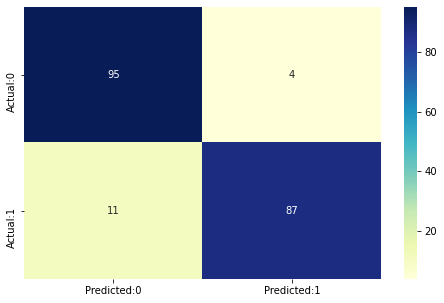

In [385]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [386]:
print(accuracy_score(y_test,y_pred))

0.9238578680203046


In [387]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



# Support Vector Machine

In [388]:
svm = SVC(kernel='rbf',C=30,gamma='auto')
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5329949238578681

with support vector machine clasifier, prediction score is very low.

# Random Forest

In [389]:
rf = RandomForestClassifier(n_estimators= 40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

<ipython-input-389-271588a5a7e6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.9238578680203046

adding more parameters to randomforest calssifier

In [390]:
#from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=7, min_samples_leaf=1)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

<ipython-input-390-7d41a79df5fc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.9289340101522843

In [391]:
y_pred=rf.predict(X_test)

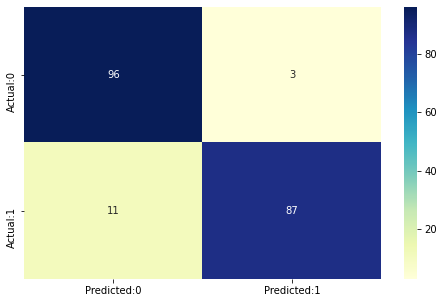

In [392]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [393]:
print(accuracy_score(y_test,y_pred))

0.9289340101522843


In [394]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        99
           1       0.97      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [395]:
print(roc_auc_score(y_test,y_pred))

0.928726035868893


In [396]:
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [397]:
X.shape

(984, 30)

In [398]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [399]:
print(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
print(get_score(SVC(), X_train, X_test, y_train, y_test))
print(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

0.9238578680203046


C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

0.5786802030456852


<ipython-input-398-054efb82e3d5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9441624365482234


In [423]:
folds = StratifiedKFold(n_splits=3)
X1= np.array(X)
y1= np.array(y).ravel()

In [424]:
fold = 0
for train_index, test_index in kf.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    fold += 1
    print("Fold: %s" % fold)
    print( 'LogisticRegression Score:' ,get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    print( 'SVC Score:', get_score(SVC(), X_train, X_test, y_train, y_test))
    print('RandomForest Score:', get_score(RandomForestClassifier(n_estimators= 50), X_train, X_test, y_train, y_test))


Fold: 1
LogisticRegression Score: 0.9176829268292683
SVC Score: 0.0
RandomForest Score: 0.850609756097561
Fold: 2
LogisticRegression Score: 0.9085365853658537
SVC Score: 0.3018292682926829


C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForest Score: 0.9146341463414634
Fold: 3
LogisticRegression Score: 0.9024390243902439
SVC Score: 0.0
RandomForest Score: 0.9298780487804879


For first iteration, LogisticRegrestion Classifier was the best, but when increasing K folds RandomForest classifer is being the best. Support Vector Machine classifier is showing the worst performance among all used classifier here.

In [429]:
cross_val_score(LogisticRegression(), X,y.values.ravel()).mean()

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

0.9268103180358438

In [430]:
cross_val_score(RandomForestClassifier(n_estimators=80), X,y.values.ravel()).mean()

0.9319019993784314

In [404]:
""""
##Define the outlier detection methods
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
classifiers = {
    "LogisticRegression":LogisticRegression(),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination='auto'),
    "Support Vector Machine":SVC(kernel='rbf', degree=3, gamma='auto',C=1.0, 
                                         max_iter=-1, random_state='None')
   
}

n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))
""""

SyntaxError: EOL while scanning string literal (<ipython-input-404-7ff3d5597138>, line 38)

# Conclusion:

Since Dataset was highly imbalanced, I used the simplest way to make it as much as balanced with "Undersampling Technique" and using 20% of dataset as a testing dataset. 
    
* At first I used Logistic Regression Classifier on the undersampled data with "Class" column as a target data, this model shows very good predection performance with 92% on 20% of our dataset is used as a testing data. KFold on Logistic Regression model didn't provide much help in increasing accuracy percentage. 
    
* Using Support Vector Machine was big disapointment here with prediction score 53%
    
* Random Forest shows the best performance here and with n_estimators=80, it shows accuracy to detecting fraud transactions of 93.5%. While its precision  of 0.90  recall of 0.97. 